In [1]:
# general imports
import json
import time
import sys
import random

# drawing imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [2]:
# path variables
# set paths here and you're good to go...

# directory containing coco-a annotations
COCOA_DIR = '/home/mronchi/Dropbox (Vision Lab Cal Tech)/Research/Image Graph Parsing/cocoa/data'
# coco-a json file
COCOA_ANN = 'cocoa_beta2015.json'
# directory containing VisualVerbnet
VVN_DIR = '/home/mronchi/Dropbox (Vision Lab Cal Tech)/Research/Image Graph Parsing/visualVerbNet'
# vvn json file
VVN_ANN = 'visual_verbnet_beta2015.json'
# directory containing the MS COCO images
COCO_IMG_DIR = '/home/mronchi/Datasets/coco/images'
# directory containing the MS COCO Python API
COCO_API_DIR = '/home/mronchi/Libraries/coco/PythonAPI'
# directory containing the MS COCO annotations
COCO_ANN_DIR = '/home/mronchi/Datasets/coco/annotations'


In [3]:
# load cocoa annotations

print("Loading COCO-a annotations...")
tic = time.time()

with open("{0}/{1}".format(COCOA_DIR,COCOA_ANN)) as f:
    cocoa = json.load(f)

# annotations with agreement of at least 1 mturk annotator
cocoa_1 = cocoa['annotations']['1']
# annotations with agreement of at least 2 mturk annotator
cocoa_2 = cocoa['annotations']['2']
# annotations with agreement of at least 3 mturk annotator
cocoa_3 = cocoa['annotations']['3']

print("Done, (t={0:.2f}s).".format(time.time() - tic))

Loading COCO-a annotations...
Done, (t=0.30s).


In [4]:
# load visual verbnet

print("Loading VisualVerbNet...")
tic = time.time()

with open("{0}/{1}".format(VVN_DIR,VVN_ANN)) as f:
    vvn = json.load(f)

# list of 145 visual actions contained in VVN
visual_actions = vvn['visual_actions']
# list of 17 visual adverbs contained in VVN
visual_adverbs = vvn['visual_adverbs']
    
print("Done, (t={0:.2f}s).".format(time.time() - tic))

Loading VisualVerbNet...
Done, (t=0.00s).


In [5]:
# visual actions in VVN by category

# each visual action is a dictionary with the following properties:
#  - id:            unique id within VVN
#  - name:          name of the visual action
#  - category:      visual category as defined in the paper
#  - definition:    [empty]
#                   an english language description of the visual action
#  - verbnet_class: [empty]
#                   corresponding verbnet (http://verbs.colorado.edu/verb-index/index.php) entry id for each visual action

for cat in set([x['category'] for x in visual_actions]):
    print("Visual Category: [{0}]".format(cat))
    for va in [x for x in visual_actions if x['category']==cat]:
        print("\t - id:[{0}], visual_action:[{1}]".format(va['id'],va['name']))

Visual Category: [nutrition]
	 - id:[46], visual_action:[chew]
	 - id:[47], visual_action:[cook]
	 - id:[48], visual_action:[devour]
	 - id:[49], visual_action:[drink]
	 - id:[50], visual_action:[eat]
	 - id:[51], visual_action:[prepare]
	 - id:[52], visual_action:[spread]
Visual Category: [perception]
	 - id:[87], visual_action:[listen]
	 - id:[88], visual_action:[look]
	 - id:[89], visual_action:[sniff]
	 - id:[90], visual_action:[taste]
	 - id:[91], visual_action:[touch]
Visual Category: [objects]
	 - id:[53], visual_action:[bend_object]
	 - id:[54], visual_action:[break]
	 - id:[55], visual_action:[brush]
	 - id:[56], visual_action:[build]
	 - id:[57], visual_action:[carry]
	 - id:[58], visual_action:[catch]
	 - id:[59], visual_action:[clear]
	 - id:[60], visual_action:[cut]
	 - id:[61], visual_action:[disassemble]
	 - id:[62], visual_action:[drive]
	 - id:[63], visual_action:[drop]
	 - id:[64], visual_action:[exchange]
	 - id:[65], visual_action:[fill]
	 - id:[66], visual_action:[

In [6]:
# visual adverbs in VVN by category

# each visual adverb is a dictionary with the following properties:
#  - id:            unique id within VVN
#  - name:          name of the visual action
#  - category:      visual category as defined in the paper
#  - definition:    [empty]
#                   an english language description of the visual action

# NOTE: relative_location is the location of the object with respect to the subject.
# It is not with respect to the reference frame of the image.
# i.e. if you where the subject, where is the object with respect to you?

for cat in set([x['category'] for x in visual_adverbs]):
    print("Visual Category: [{0}]".format(cat))
    for va in [x for x in visual_adverbs if x['category']==cat]:
        print("\t - id:[{0}], visual_adverb:[{1}]".format(va['id'],va['name']))

Visual Category: [emotion]
	 - id:[1], visual_adverb:[anger]
	 - id:[2], visual_adverb:[disgust]
	 - id:[3], visual_adverb:[fear]
	 - id:[4], visual_adverb:[happiness]
	 - id:[5], visual_adverb:[neutral]
	 - id:[6], visual_adverb:[sadness]
	 - id:[7], visual_adverb:[surprise]
Visual Category: [distance]
	 - id:[14], visual_adverb:[far]
	 - id:[15], visual_adverb:[full_contact]
	 - id:[16], visual_adverb:[light_contact]
	 - id:[17], visual_adverb:[near]
Visual Category: [location]
	 - id:[8], visual_adverb:[above]
	 - id:[9], visual_adverb:[behind]
	 - id:[10], visual_adverb:[below]
	 - id:[11], visual_adverb:[in_front]
	 - id:[12], visual_adverb:[left]
	 - id:[13], visual_adverb:[right]


In [13]:
# each annotation in cocoa is a dictionary with the following properties:

#  - id:             unique id within coco-a
#  - image_id:       unique id of the image from the MS COCO dataset
#  - object_id:      unique id of the object from the MS COCO dataset
#  - subject_id:     unique id of the subject from the MS COCO dataset
#  - visual_actions: list of visual action ids performed by the subject (with the object if present)
#  - visual_adverbs: list of visual adverb ids describing the subject (and object interaction if present)
print("="*30)

# find all interactions between any subject and any object in an image
image_id = 516931
image_interactions = [x for x in cocoa_2 if x['image_id']==image_id]
print(image_interactions)
print("="*30)

# find all interactions of a subject with any object
subject_id = 190190
# NOTE: In this image there is no interaction with guitar cause it is not annotated in MS COCO
subject_interactions = [x for x in cocoa_2 if x['subject_id']==subject_id]
print(subject_interactions)
print("="*30)

# find interactions of all subjects with an object
object_id = 304500
object_interactions = [x for x in cocoa_2 if x['object_id']==object_id]
print(object_interactions)
print("="*30)

# find all interactions containing a certain visual action
va_name = 'play_instrument'
va_id   = [x for x in visual_actions if x['name']==va_name][0]['id']
interactions = [x for x in cocoa_2 if va_id in x['visual_actions']]
print(interactions)
print("="*30)

[{u'visual_adverbs': [4], u'subject_id': 424258, u'object_id': -1, u'image_id': 516931, u'visual_actions': [109, 156], u'id': 822145749}, {u'visual_adverbs': [17, 9], u'subject_id': 424258, u'object_id': 440510, u'image_id': 516931, u'visual_actions': [116], u'id': 898004752}, {u'visual_adverbs': [15, 10], u'subject_id': 424258, u'object_id': 640623, u'image_id': 516931, u'visual_actions': [29, 91, 75], u'id': 771325559}, {u'visual_adverbs': [17, 11], u'subject_id': 440510, u'object_id': 424258, u'image_id': 516931, u'visual_actions': [88, 115, 117], u'id': 313937370}, {u'visual_adverbs': [16, 13], u'subject_id': 440510, u'object_id': 1995427, u'image_id': 516931, u'visual_actions': [91, 57], u'id': 86762482}, {u'visual_adverbs': [4], u'subject_id': 440510, u'object_id': -1, u'image_id': 516931, u'visual_actions': [114, 147], u'id': 377702020}]
[{u'visual_adverbs': [17, 11], u'subject_id': 190190, u'object_id': 28870, u'image_id': 332176, u'visual_actions': [88], u'id': 488067638}, {u'

In [8]:
# coco-a is organized to be easily integrable with MS COCO

# load coco annotations
ANN_FILE_PATH = "{0}/instances_{1}.json".format(COCO_ANN_DIR,'train2014')

if COCO_API_DIR not in sys.path:
    sys.path.append( COCO_API_DIR )
from pycocotools.coco import COCO

coco = COCO( ANN_FILE_PATH )

loading annotations into memory...
Done (t=7.85s)
creating index...
index created!


Image ID:  [430493]
Subject ID:[421691]
Object ID: [1977203], Category: [cell phone]

Visual Actions:
  - id:[29], name:[hold]
  - id:[91], name:[touch]
  - id:[87], name:[listen]
  - id:[84], name:[use]

Visual Adverbs:
  - id:[15], name:[full_contact]
  - id:[11], name:[in_front]
  - id:[13], name:[right]


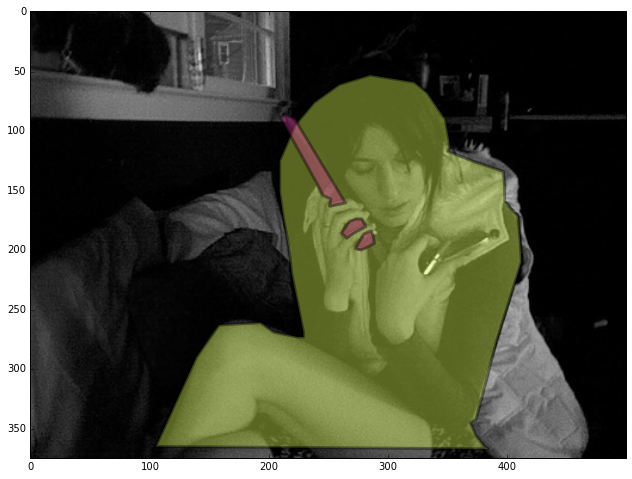

In [9]:
# visualize an image with subject and object
# and print the interaction annotations

# object_id == -1 means that the annotation is describing a subject and not an interaction
interaction  = random.choice([x for x in cocoa_2 if x['object_id']!=-1 if len(x['visual_actions'])>2])
image_id     = interaction['image_id']

subject_id   = interaction['subject_id']
subject_anns = coco.loadAnns(subject_id)[0]

object_id    = interaction['object_id']
object_anns  = coco.loadAnns(object_id)[0]
object_cat   = coco.cats[object_anns['category_id']]['name']

v_actions    = interaction['visual_actions']
v_adverbs    = interaction['visual_adverbs']

print("Image ID:  [{0}]".format(image_id))
print("Subject ID:[{0}]".format(subject_id))
print("Object ID: [{0}], Category: [{1}]".format(object_id,object_cat))

print("\nVisual Actions:")
for va_id in v_actions:
    va = [x for x in visual_actions if x['id']==va_id][0]
    print("  - id:[{0}], name:[{1}]".format(va['id'],va['name']))
    
print("\nVisual Adverbs:")
for va_id in v_adverbs:
    va = [x for x in visual_adverbs if x['id']==va_id][0]
    print("  - id:[{0}], name:[{1}]".format(va['id'],va['name']))

img = coco.loadImgs(image_id)[0]
I = io.imread("{0}/{1}/{2}".format(COCO_IMG_DIR,'train2014',img['file_name']))
plt.figure(figsize=(12,8))
plt.imshow(I)
coco.showAnns([subject_anns,object_anns])